In [76]:
#importando as bibliotecas para manipulação
import pandas as pd
import numpy as np
import datetime

#importando bibliotecas de visualização
from matplotlib import pyplot as plt
import seaborn as sns

# importando bibliotecas para importação de data base
import requests
from io import StringIO

## Retirar warnings
import warnings
warnings.filterwarnings('ignore')

# importando bibliotecas para a criação dos modelos
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# importando bibliotecas para métricas
from sklearn.metrics import classification_report

In [138]:
orig_url='https://drive.google.com/file/d/13jSMzdwO3nZDr-n62--fO4jrE-oIG8cX/view'

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
df_wine = pd.read_csv(csv_raw, sep=';')
df_wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [139]:
### Seguir passos de acordo com o enunciado (não conta nas questões das atividades)
### Questões, a partir da próxima célula

## Separar variáveis X e y
X=df_wine.drop(columns=['quality'])
y=df_wine['quality']

# Normalizar os dados
X = MinMaxScaler().fit_transform(X)


## Para a divisão dos dados de treinamento e teste dos algoritmos utilize o valor de “random_state=1” e a proporção de 70% para treinamento e 30% para teste.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Utilize a normalização dos dados utilizando o MinMaxScaler para todos os algoritmos. 


## Definindo a função para testar os modelos
def validaPerformanceModelos(pipelines,x_train,y_train):
    results = []
    names = []
    for name, model in pipelines:
        model.fit(X_train,y_train)
        score = model.score(X_test, y_test)
        results.append(score)
        names.append(name)
        msg = "%s: %f" % (name, score)
        print(msg) 

# Criando pipeline para os modelos
pipelines = []                                                                  
pipelines.append(('clf_KNN', Pipeline([('clf_KNN',KNeighborsClassifier(n_neighbors=5))])))
pipelines.append(('clf_arvore', Pipeline([('clf_arvore', DecisionTreeClassifier())])))
pipelines.append(('clf_floresta', Pipeline([('clf_floresta', RandomForestClassifier(max_depth=10, random_state=1))])))
pipelines.append(('clf_svm', Pipeline([('clf_svm',SVC(gamma='auto',kernel='rbf'))])))
pipelines.append(('mlp', Pipeline([('mlp', MLPClassifier(alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1))])))
                                                    
validaPerformanceModelos(pipelines, X_train, y_train)                                                                   

clf_KNN: 0.564583
clf_arvore: 0.614583
clf_floresta: 0.656250
clf_svm: 0.585417
mlp: 0.600000


In [78]:
## Apicando a rede MLP como mostrado no enunciado e com os mesmos dados de treinamento e teste utilizados, 
##df_mlp = scaler = MinMaxScaler().fit_transform(df_wine)
print('mlp = 60%')

mlp = 60%


In [94]:
## Quantas instâncias existem para a qualidade do vinho igual a 5?
df_wine[df_wine['quality']== 5].shape[0]

681

In [95]:
## Qual é a mediana para a variável "residual sugar"?
df_wine["residual sugar"].median()

2.2

In [141]:
## Aplicando o algoritmo SVM para a classificação da qualidade dos vinhos com os mesmos valores anteriores
## para treinamento e teste, qual é o valor de acurácia obtido?
print('clf_svm: 0.59')

clf_svm: 0.59


In [101]:
## Aplique o modelo de normalização MinMaxScaler com os valores "default" para os dados de entrada. 
## Qual é o menor valor para a variável "fixed acidity"?
MinMaxScaler().fit_transform(df_wine[['fixed acidity','quality']]).min()

0.0

In [103]:
## Aplicando o algoritmo de floresta randomica com os mesmos parâmetros apresentados no enunciado e mesmos valores 
## treinamento e teste, qual é o valor da acurácia?
print('clf_floresta: 0.66')

clf_floresta: 0.66


In [108]:
## Quantos tipos diferentes de dados existem no dataset do desafio?
df_wine.dtypes.nunique()

2

In [109]:
## Após dividir o dataset utilizando o método train_test_split(entradas_normalizadas, saida, test_size=0.30, 
## random_state=1). Qual foi a acurária para o KNN?
print('clf_KNN: 0.56')

clf_KNN: 0.56


In [110]:
## Qual é o desvio padrão para a variável "fixed acidity" ?
df_wine['fixed acidity'].std()

1.7410963181277006

In [117]:
## Qual é a proporção (em %) de valores nulos existente na coluna "residual sugar" (resíduo de açucar)?
df_wine['residual sugar'].isnull().sum()/df_wine.shape[0]

0.0

In [118]:
## No dataset utilizado para o desafio, quantas instâncias e atributos existem, respectivamente?
df_wine.shape

(1599, 12)

          quality   alcohol
quality  1.000000  0.476166
alcohol  0.476166  1.000000
Há uma correlação moderada, é possível inferir que quanto maior o teor, em certa medida, maior é a qualidade


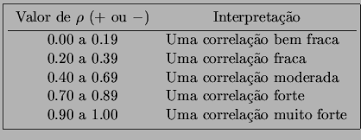

In [126]:
## Mesmo sendo reduzido, é CORRETO dizer sobre o coeficiente de correlação de Pearson entre as variáveis "quality" e "alcohol":

#Quanto maior o teor alcoolico (alcohol), maior é a qualidade do vinho (quality).
#Não é possível dizer nada sobre a correlação entre as vairáveis.
#Para analisar correlação é necessário que o coeficiente seja superior a 1.
#Quanto maior o teor alcoolico (alcohol), menor é a qualidade do vinho (quality).

print(df_wine[["quality" , "alcohol"]].corr(method = 'pearson'))
print('Há uma correlação moderada, é possível inferir que quanto maior o teor, em certa medida, maior é a qualidade')
from IPython.display import Image
Image('dados/correlation.png')

In [128]:
## Sobre o coeficiente de correlação de Pearson entre as variáveis "fixed acidity" e "pH" é CORRETO afirmar:

#Existe uma correlação positiva. Quanto maior o "fixed acidity, menor é o "pH".
#Existe uma correlação negativa. Quanto maior o "fixed acidity, menor é o "pH".
#Existe uma correlação negativa. Quanto maior o "fixed acidity, maior é o "pH".
#Existe uma correlação negativa. Quanto menor o "fixed acidity, menor é o "pH".

print(df_wine[["fixed acidity" , "pH"]].corr(method = 'pearson'))
print('Existe uma correlação negativa. Quanto maior o "fixed acidity, menor é o "pH".')

               fixed acidity        pH
fixed acidity       1.000000 -0.682978
pH                 -0.682978  1.000000
Existe uma correlação negativa. Quanto maior o "fixed acidity, menor é o "pH".


In [140]:
## Aplicando o algoritmo de árvore de decisão com os parâmetros definidos no enunciado do desafio e a divisão de 
## treinamento e teste como mostrado, anteriormente. Qual é o valor da acurácia?
print('clf_arvore: 0.61')

clf_arvore: 0.61


In [136]:
## Modifique o dataset para um sistema binário que considere vinhos com nota maior do que 5 (6, 7, 8) sejam bons e menores ou 
## igual a 5 ruins (5, 4, 3). Aplique o modelo da floresta randômica. Qual a acurácia do modelo para esse novo dataset?

# converter números para categoria
df_wine['quality'] = df_wine['quality'].replace(6, 1)
df_wine['quality'] = df_wine['quality'].replace(7, 1)
df_wine['quality'] = df_wine['quality'].replace(8, 1)
df_wine['quality'] = df_wine['quality'].replace(3, 0)
df_wine['quality'] = df_wine['quality'].replace(4, 0)
df_wine['quality'] = df_wine['quality'].replace(5, 0)

# Separar dados X e y
X = df_wine.drop(['quality'], axis=1)
y = df_wine['quality']


# criar dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 ,random_state = 1)

# criar o modelo
clf_floresta = RandomForestClassifier(max_depth=10, random_state=1)
clf_floresta.fit(X_train, y_train)

# verificar acurácia
score = clf_floresta.score(X_test, y_test)
print('Acurácia: ',score)

Acurácia:  0.7770833333333333
